In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
# Load the dataset
df = pd.read_csv('/Users/yusufa/Documents/class/Project-2/Loan_default.csv')

# Display basic information about the dataset
df.info()
df.head()
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [22]:
df.drop(columns=['LoanID'], inplace=True)

In [23]:
label_encoders = {}
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                    'HasDependents', 'LoanPurpose', 'HasCoSigner']

In [24]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [25]:
X = df.drop(columns=['Default'])
y = df['Default']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Overfitting Gap:", train_accuracy - test_accuracy)
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

In [ ]:
# Train and evaluate Radom Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)
train_and_evaluate_model(rf_model, "Random Forest")


Model: Random Forest
Train Accuracy: 0.9350342916725818
Test Accuracy: 0.8445271196397102
Overfitting Gap: 0.09050717203287162
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     45139
           1       0.33      0.33      0.33      5931

    accuracy                           0.84     51070
   macro avg       0.62      0.62      0.62     51070
weighted avg       0.84      0.84      0.84     51070



In [30]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(max_depth=15, class_weight='balanced', random_state=42)
train_and_evaluate_model(dt_model, "Decision Tree")


Model: Decision Tree
Train Accuracy: 0.7758093177401274
Test Accuracy: 0.6876835715684355
Overfitting Gap: 0.08812574617169189
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80     45139
           1       0.19      0.53      0.28      5931

    accuracy                           0.69     51070
   macro avg       0.56      0.62      0.54     51070
weighted avg       0.83      0.69      0.74     51070



In [31]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(model, X_test_scaled, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()



In [ ]:
# Train and evaluate Logistic Regression
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
train_and_evaluate_model(log_reg_model, "Logistic Regression")


Model: Logistic Regression
Train Accuracy: 0.6731399031706947
Test Accuracy: 0.673996475425886
Overfitting Gap: -0.0008565722551913124
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     45139
           1       0.22      0.70      0.33      5931

    accuracy                           0.67     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.67      0.73     51070




Model: Random Forest
Train Accuracy: 0.9350342916725818
Test Accuracy: 0.8445271196397102
Overfitting Gap: 0.09050717203287162
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     45139
           1       0.33      0.33      0.33      5931

    accuracy                           0.84     51070
   macro avg       0.62      0.62      0.62     51070
weighted avg       0.84      0.84      0.84     51070



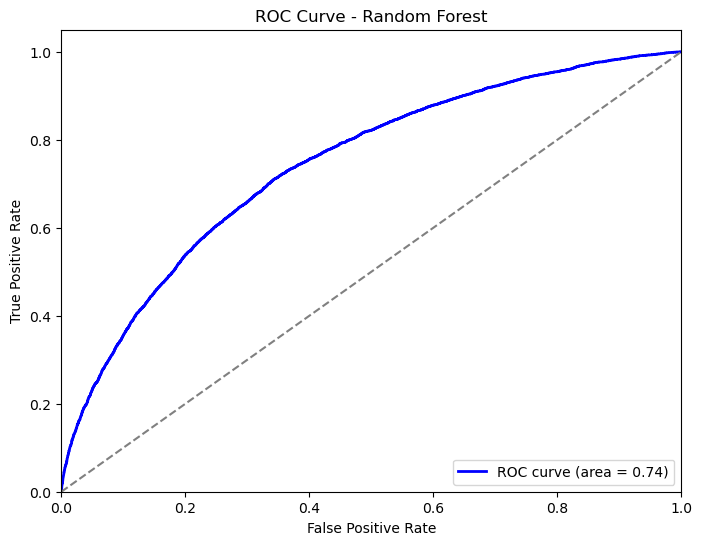

In [33]:
# Ensure test data is scaled
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model and plot ROC curve
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)
train_and_evaluate_model(rf_model, "Random Forest")

# Plot ROC for Random Forest
plot_roc_curve(rf_model, X_test_scaled, y_test, "Random Forest")

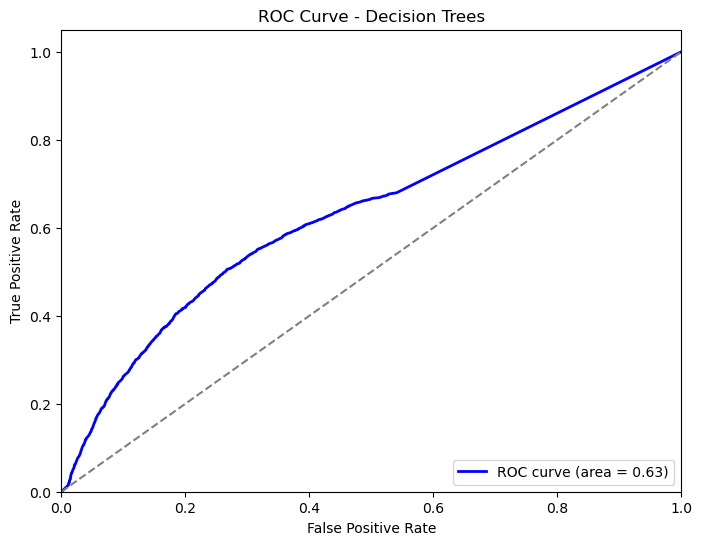

In [34]:
plot_roc_curve(dt_model, X_test_scaled, y_test, "Decision Trees")

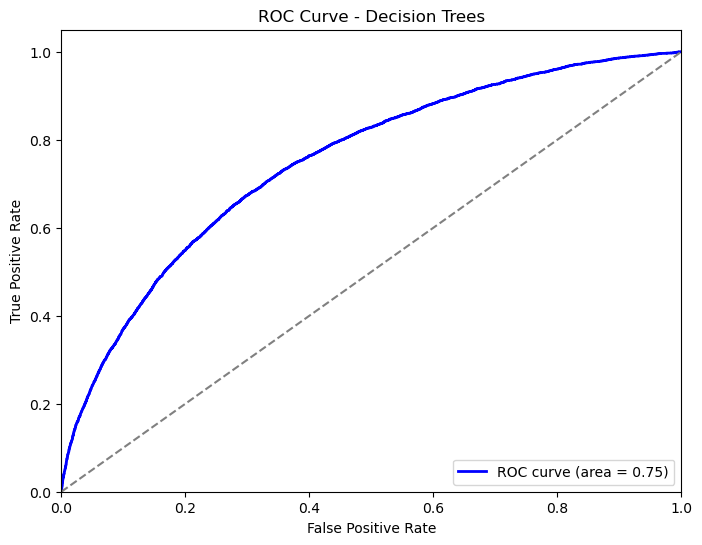

In [ ]:
plot_roc_curve(log_reg_model, X_test_scaled, y_test, "Logistic regression")

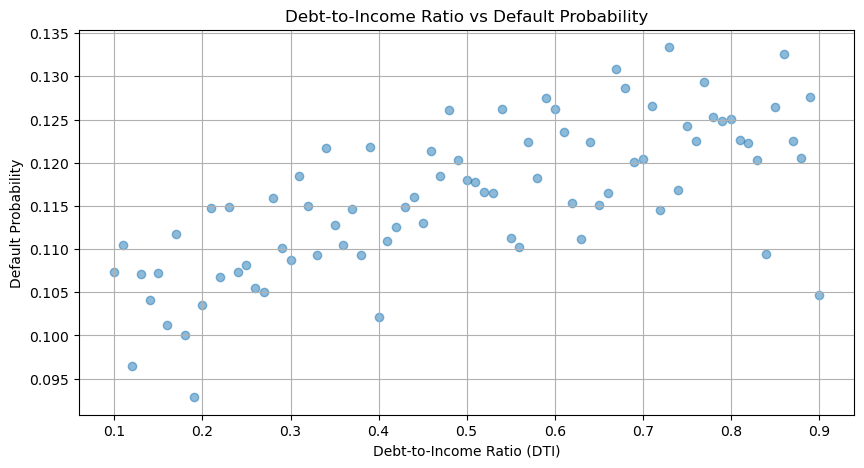

In [35]:
import matplotlib.pyplot as plt

# Group data by DTIRatio and calculate default probability
df_grouped = df.groupby("DTIRatio")["Default"].mean().reset_index()

# Plot DTIRatio vs Default Probability
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped["DTIRatio"], df_grouped["Default"], alpha=0.5)
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Default Probability")
plt.title("Debt-to-Income Ratio vs Default Probability")
plt.grid(True)
plt.show()

/var/folders/82/dnd4ztv166v18z61bn2krt5r0000gn/T/ipykernel_1921/3793000624.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_loan = df.groupby("LoanAmountBins")["Default"].mean().reset_index()


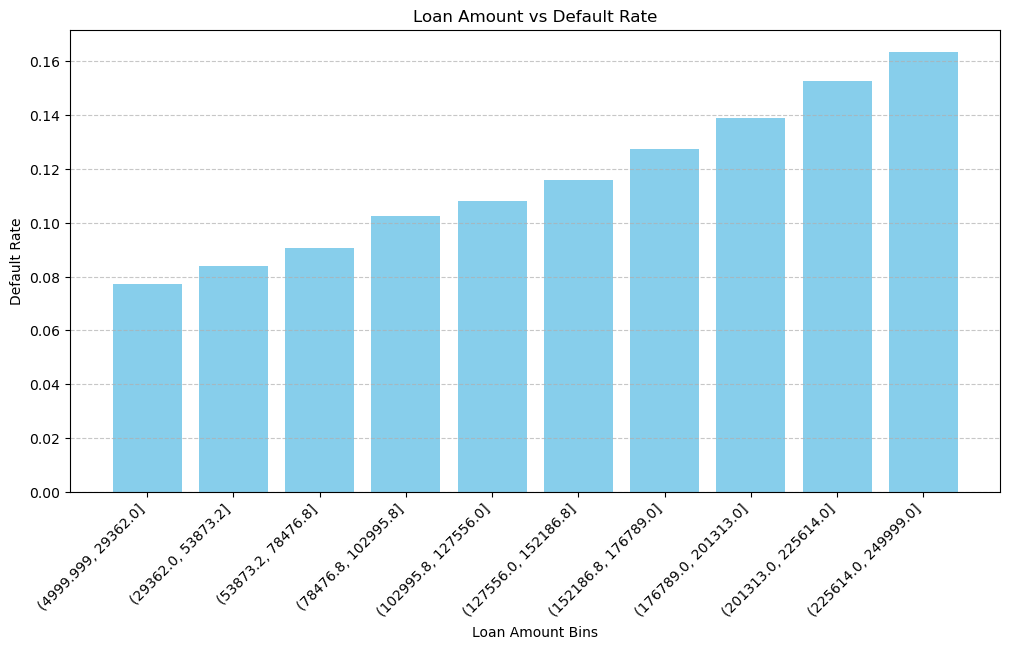

In [ ]:
# Group data by LoanAmount bins and calculate default probability
df["LoanAmountBins"] = pd.qcut(df["LoanAmount"], q=10)  
# Creating 10 quantile-based bins
df_grouped_loan = df.groupby("LoanAmountBins")["Default"].mean().reset_index()

# Convert bins to string for better visualization
df_grouped_loan["LoanAmountBins"] = df_grouped_loan["LoanAmountBins"].astype(str)

# Plot bar chart of Loan Amount vs Default Rate
plt.figure(figsize=(12, 6))
plt.bar(df_grouped_loan["LoanAmountBins"], df_grouped_loan["Default"], color="skyblue")
plt.xlabel("Loan Amount Bins")
plt.ylabel("Default Rate")
plt.title("Loan Amount vs Default Rate")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
